In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


In [15]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
print(train.shape)
train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')
print(train.shape)
train.head()


(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_arr = np.array(train, dtype='float32')
test_arr = np.array(test, dtype='float32')

# Data Preprocessing

In [18]:
def preprocess(arr):
    x = arr[:, 1:]/255.0
    y = arr[:, 0]
    
    return x, y

In [19]:
X_train, y_train = preprocess(train_arr)

In [20]:
X_test, y_test = preprocess(test_arr)

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=36)

# Data Augmentation

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)

In [27]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

# Modeling with CNN

In [28]:
model = Sequential()

# First layer
model.add(Conv2D(128, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second layer
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(10, activation='softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 512)         1

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(lr=0.0003),
             metrics=['accuracy'])

# Training

In [30]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 64),
                    steps_per_epoch = len(X_train) // 64, 
                    epochs = 125, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/125
750/750 [==============================] - 18s 25ms/step - loss: 1.0852 - accuracy: 0.5995 - val_loss: 0.6627 - val_accuracy: 0.7520
Epoch 2/125
750/750 [==============================] - 18s 24ms/step - loss: 0.6392 - accuracy: 0.7613 - val_loss: 0.4729 - val_accuracy: 0.8088
Epoch 3/125
750/750 [==============================] - 19s 25ms/step - loss: 0.5540 - accuracy: 0.7955 - val_loss: 0.4378 - val_accuracy: 0.8356
Epoch 4/125
750/750 [==============================] - 19s 25ms/step - loss: 0.4841 - accuracy: 0.8245 - val_loss: 0.3649 - val_accuracy: 0.8643
Epoch 5/125
750/750 [==============================] - 18s 24ms/step - loss: 0.4418 - accuracy: 0.8400 - val_loss: 0.3573 - val_accuracy: 0.8678
Epoch 6/125
750/750 [==============================] - 19s 25ms/step - loss: 0.4094 - accuracy: 0.8530 - val_loss: 0.3283 - val_accuracy: 0.8773
Epoch 7/125
750/750 [==============================] - 18s 24ms/step - loss: 0.3831 - accuracy: 0.8624 - val_loss: 0.2909 - val_ac

750/750 [==============================] - 18s 24ms/step - loss: 0.1870 - accuracy: 0.9322 - val_loss: 0.2351 - val_accuracy: 0.9216
Epoch 58/125
750/750 [==============================] - 18s 23ms/step - loss: 0.1874 - accuracy: 0.9320 - val_loss: 0.2360 - val_accuracy: 0.9252
Epoch 59/125
750/750 [==============================] - 18s 24ms/step - loss: 0.1845 - accuracy: 0.9334 - val_loss: 0.2380 - val_accuracy: 0.9233
Epoch 60/125
750/750 [==============================] - 18s 24ms/step - loss: 0.1833 - accuracy: 0.9347 - val_loss: 0.2292 - val_accuracy: 0.9275
Epoch 61/125
750/750 [==============================] - 17s 23ms/step - loss: 0.1843 - accuracy: 0.9332 - val_loss: 0.2313 - val_accuracy: 0.9245
Epoch 62/125
750/750 [==============================] - 18s 23ms/step - loss: 0.1812 - accuracy: 0.9339 - val_loss: 0.2422 - val_accuracy: 0.9208
Epoch 63/125
750/750 [==============================] - 19s 25ms/step - loss: 0.1807 - accuracy: 0.9348 - val_loss: 0.2352 - val_accuracy

750/750 [==============================] - 18s 24ms/step - loss: 0.1444 - accuracy: 0.9487 - val_loss: 0.2593 - val_accuracy: 0.9276
Epoch 114/125
750/750 [==============================] - 18s 24ms/step - loss: 0.1457 - accuracy: 0.9482 - val_loss: 0.2686 - val_accuracy: 0.9243
Epoch 115/125
750/750 [==============================] - 17s 23ms/step - loss: 0.1432 - accuracy: 0.9481 - val_loss: 0.2464 - val_accuracy: 0.9275
Epoch 116/125
750/750 [==============================] - 18s 25ms/step - loss: 0.1443 - accuracy: 0.9482 - val_loss: 0.2734 - val_accuracy: 0.9243
Epoch 117/125
750/750 [==============================] - 18s 24ms/step - loss: 0.1412 - accuracy: 0.9494 - val_loss: 0.2460 - val_accuracy: 0.9296
Epoch 118/125
750/750 [==============================] - 17s 23ms/step - loss: 0.1413 - accuracy: 0.9495 - val_loss: 0.2639 - val_accuracy: 0.9253
Epoch 119/125
750/750 [==============================] - 18s 24ms/step - loss: 0.1420 - accuracy: 0.9494 - val_loss: 0.2578 - val_ac

In [32]:
# Save the model
model.save('my_model.h5')

# Evaluation

In [31]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2399 - accuracy: 0.9296


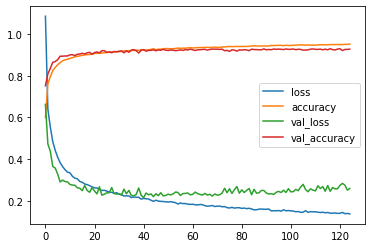

In [33]:
pd.DataFrame(history.history).plot()

# Prediction

In [34]:
pred = model.predict(X_test)

In [35]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred = np.argmax(pred, axis=1)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.86      1000
         1.0       0.99      0.99      0.99      1000
         2.0       0.94      0.87      0.90      1000
         3.0       0.93      0.95      0.94      1000
         4.0       0.91      0.88      0.90      1000
         5.0       0.99      1.00      0.99      1000
         6.0       0.73      0.85      0.78      1000
         7.0       0.96      0.98      0.97      1000
         8.0       0.99      1.00      0.99      1000
         9.0       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# Prediction Visualization

In [39]:
import matplotlib.pyplot as plt

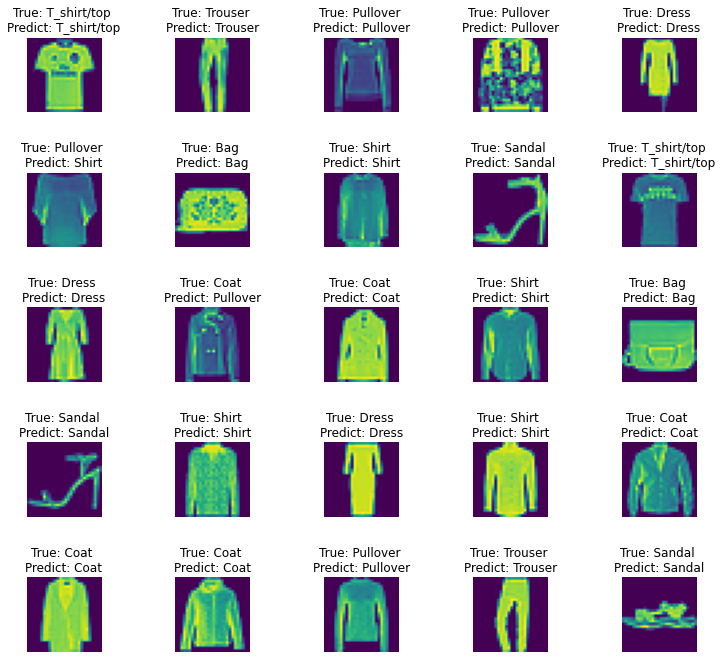

In [40]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(25):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('True: %s \nPredict: %s' % (class_names[int(y_test[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

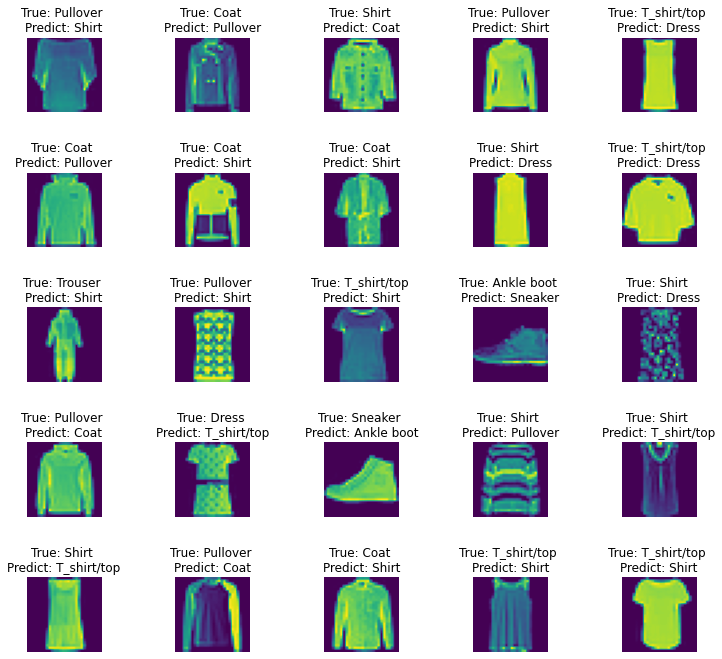

In [41]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

miss_pred = np.where(y_pred != y_test)[0]
for i in np.arange(25):
    axes[i].imshow(X_test[miss_pred[i]].reshape(28,28))
    axes[i].set_title('True: %s \nPredict: %s' % (class_names[int(y_test[miss_pred[i]])],
                                                 class_names[y_pred[miss_pred[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)